

# Lab 1: MNIST EDA

**People: Lucas Williamson, Fatima Awada, Matt Nicholson, Jessie Smith**

## DATASET CONTENTS SECTION
What are the contents of this dataset? *Please include enough detail that someone unfamiliar with the dataset who might want to use it can understand what is in the dataset.*

**Specifically, be sure to include:**
- What does each item/data point represent (e.g., a document, a photo, a person, a country)?
    - A handwritten digit (any number between 0 and 9)
- How many items are in the dataset?
    - 60,000 28x28 grayscale images
- What data is available about each item (e.g., if the item is a person, available data might include age, gender, device usage, etc.)? Is it raw data (e.g., unprocessed text or images) or features (variables)?
    - The label format for the MNIST are numbers from 0-9
    - The dataset comprises of grayscale images

- For static datasets: What timeframe does the dataset cover (e.g., tweets from January 2010–December 2020)?
    - Data is from 1998
- Is there any missing information in the dataset? If yes, please explain what information is missing and why (e.g., some people did not report their gender).
Note: Consider the impact of missing information on appropriate uses of this dataset.
    - No, I think all of the information is there.
- What errors, sources of noise, or redundancies are important for data set users to be aware of?
Note: Consider how errors, noise, redundancies might impact appropriate uses of this dataset.
    - One thing for users to be aware of would be that the images were resized from a 20x20 to a 28x28 size while keeping their aspect ratio the same.

    - The data here is also not in a normal image format
    - After looking at the averages of all of the digits we can see some potential problems with the image quality which may be from the fact of the low resolution 28x28.
    - Additionally, some of the actual digits themselves are ambiguous -- for example, some of the 1s looks kind of like 7s

- What data might be out of date or no longer available (e.g., broken links in old tweets)?
    - Considering that MNIST was from the 90’s, there could be new and improved larger data that represent more handwriting styles. Another one, could be outdated handwriting styles.
- How was the data validated/verified?
    - It was validated through user testing and labeling of the data. This data today is seen as a standard for image recognition testing. It has also had some extensive machine learning benchmarks and public use.

- What are potential validity issues a user of this dataset needs to be aware of (e.g., survey answers might not be truthful, age was guessed by a model and might be incorrect, GPA was used to quantify intelligence)?
    - One point where there could be validity issues is if someone trains a model on MNIST data, and that person would input data from another language like Chinese or arabic. Another issue that could lead to misclassification as some of the digits can be misrepresented as other numbers. For example, some people write 4 like a 9 depending on their handwriting, and looking at 4 in MNIST, if it was written with it being connected it could misclassify as a 9.
- What are other potential data quality issues a user of this dataset needs to be aware of?
    - A potential data quality issue a user should be aware of is not being able to cleary see what every digit represents numerically. This is due to poor image resolution, as well as ambiguous handwriting.




In [ ]:
# does this make it real-time?

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import our packages etc

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [ ]:
# we were getting a 403 error from the actual website, just use the TensorFlow one
mnist = tf.keras.datasets.mnist.load_data()

In [ ]:
# unpack each of the train, test, images, label

train_images, train_labels = mnist[0]
test_images, test_labels = mnist[1]

In [ ]:
 # make it a dataframe for convenience
train_labels = pd.DataFrame(train_labels)
test_labels = pd.DataFrame(test_labels)

### How many of each label do we have?

Text(0.5, 0.98, 'Distributions of Digits in the MNIST Train Set')

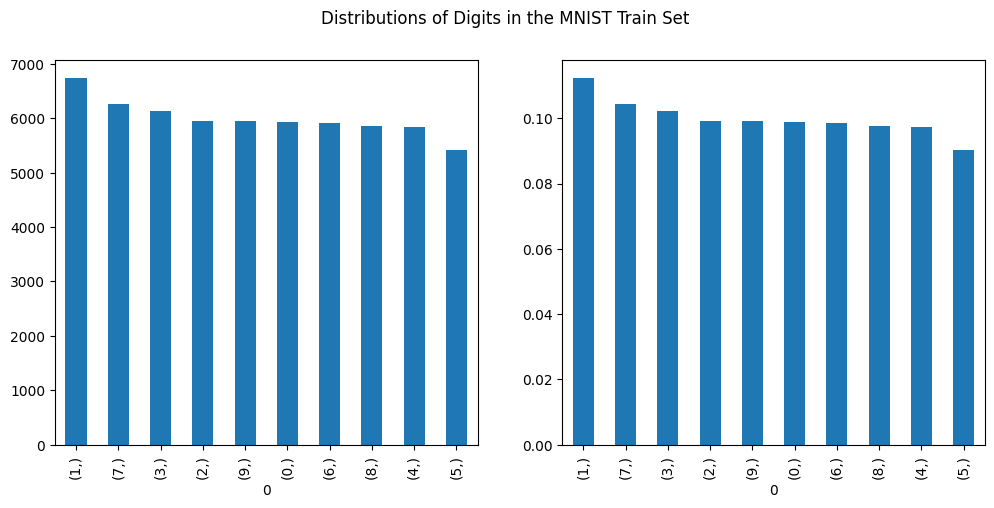

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))

train_labels.value_counts().plot(kind="bar", ax=ax[0])
train_labels.value_counts(normalize=True).plot(kind="bar", ax=ax[1])

fig.suptitle("Distributions of Digits in the MNIST Train Set")

Text(0.5, 0.98, 'Distributions of Digits in the MNIST Test Set')

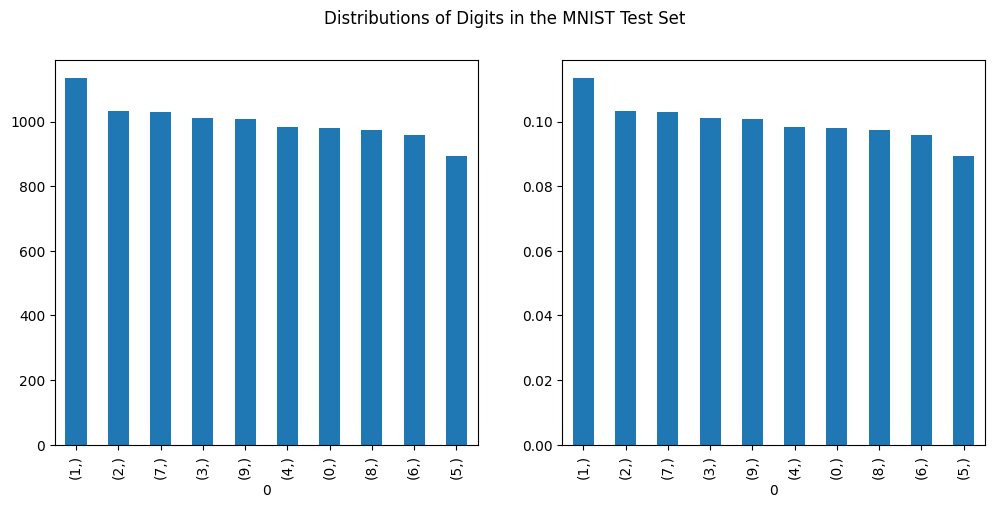

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))

test_labels.value_counts().plot(kind="bar", ax=ax[0])
test_labels.value_counts(normalize=True).plot(kind="bar", ax=ax[1])

fig.suptitle("Distributions of Digits in the MNIST Test Set")


There are more 2s in the test than in the train (comparatively)

### Ok, what about the actual images here?

Each image is 28 by 28, and there are 60000 images.
This data goes from 0 to 255


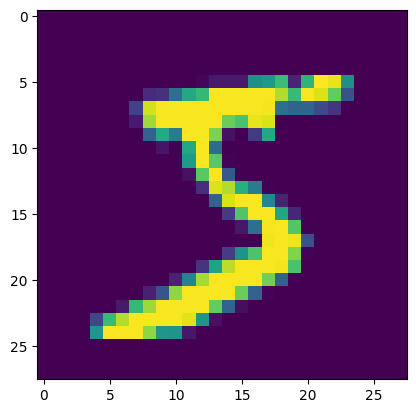

In [ ]:
# what is the shape of the images:

image_index = 0

print(f"Each image is {train_images[image_index, :, :].shape[0]} by\
 {train_images[image_index, :, :].shape[1]}, and there are {train_images.shape[0]} images.")

print(f"This data goes from {train_images.min()} to {train_images.max()}")

plt.imshow(train_images[image_index, :, :])

Look at an example of one digit.

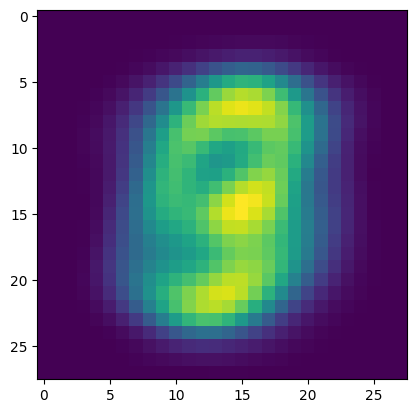

In [ ]:
# What are the most frequently filled pixels in the data set?

# Mean image of all images in the training dataset
plt.imshow(train_images.mean(axis=0))

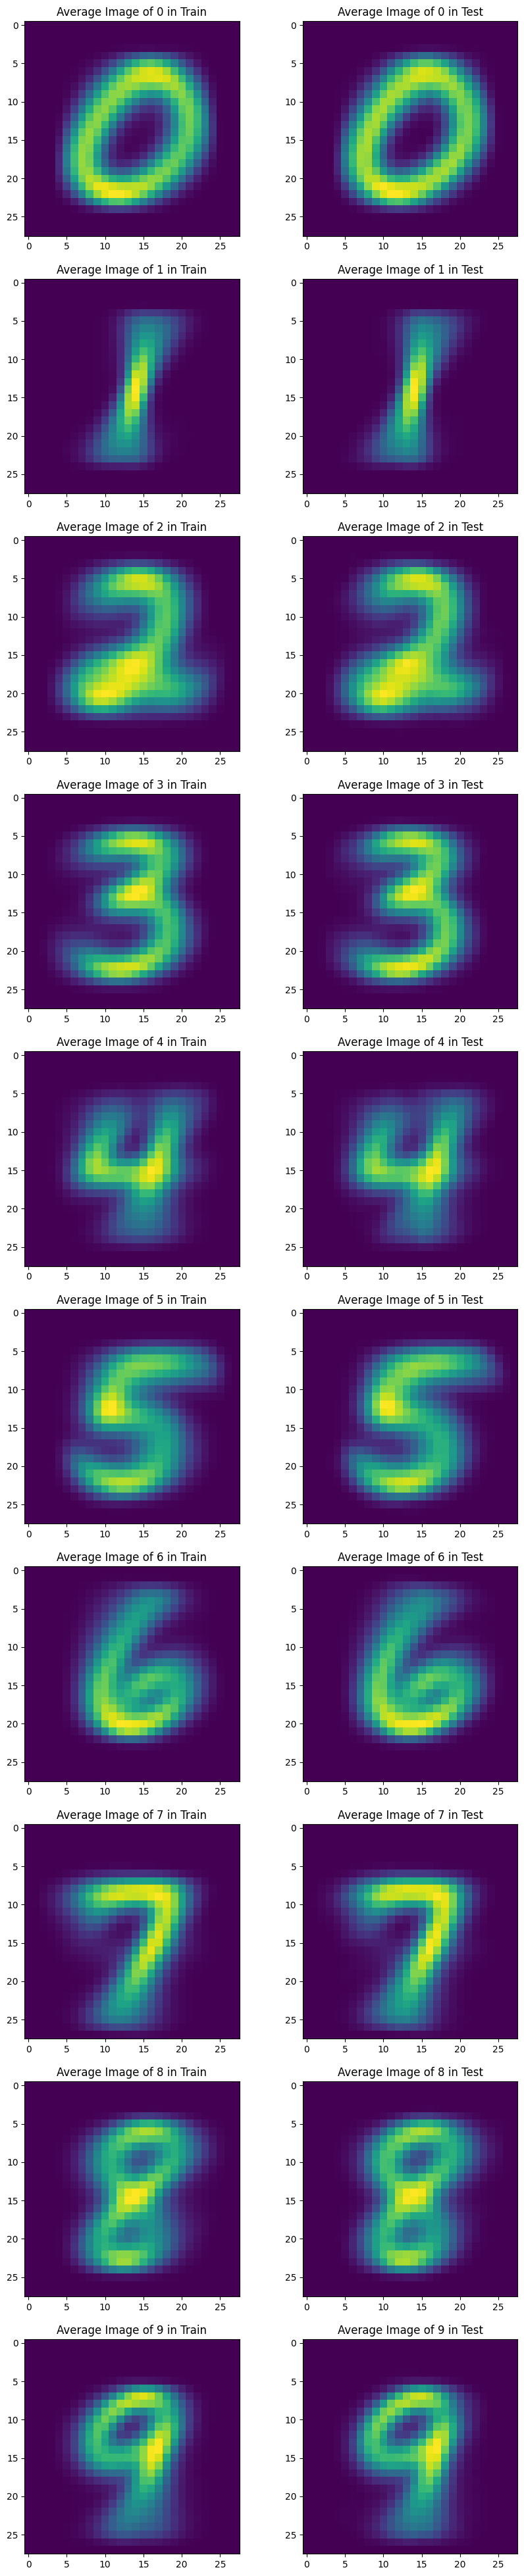

In [ ]:
# Mean image per label
fig,ax = plt.subplots(nrows=10, ncols=2, figsize=(10, 50))

for ii in range(0,10):
  ax[ii][0].imshow(train_images[(train_labels.values == ii).reshape(-1),:, :].mean(axis=0))
  ax[ii][0].set_title(f"Average Image of {ii} in Train")

  ax[ii][1].imshow(test_images[(test_labels.values == ii).reshape(-1),:, :].mean(axis=0))
  ax[ii][1].set_title(f"Average Image of {ii} in Test")

### Interpretation of Image Mean
- The images with the lowest quality based on manual checks of the image mean are: 1, 9 (probably because people draw their ones and nines differently)
- There are probably some images that are themselves ambiguous (e.g. 1 and 7)
- All images generally fall within the central image boundary (as the dataset guarantees)
